# Rainfall Prediction - Weather Forecasting

Weather forecasting is the application of science and technology to predict 
the conditions of the atmosphere for a given location and time. Weather forecasts
are made by collecting quantitative data about the current state of the atmosphere
at a given place and using meteorology to project how the atmosphere will change


## PROJECT GOAL

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler # To fit all data on same scale
from sklearn.model_selection import train_test_split # To split data in 2 parts
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

#### Load Dataset

In [2]:
df = pd.read_csv("weather.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


#### Check some basic operation like shape, data types, relation, statatics

In [3]:
df.shape

#we have 8425 rows and 23 columns

(8425, 23)

In [4]:
df.dtypes

#there are 6 objective datatype columns and 17 float type columns

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df.isnull().sum()

#checking for null values.. there are many null values

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Handle missing values

Here we will manage values with mean and we will take mean with reference to location for better handling

In [7]:
df['MinTemp']=df.groupby('Location').MinTemp.transform(lambda x: x.fillna(x.mean()))
df['MaxTemp']=df.groupby('Location').MaxTemp.transform(lambda x: x.fillna(x.mean()))
df['Rainfall']=df.groupby('Location').Rainfall.transform(lambda x: x.fillna(x.mean()))
df['Sunshine']=df.groupby('Location').Sunshine.transform(lambda x: x.fillna(x.mean()))
df['WindSpeed3pm']=df.groupby('Location').WindSpeed3pm.transform(lambda x: x.fillna(x.mean()))
df['Pressure9am']=df.groupby('Location').Pressure9am.transform(lambda x: x.fillna(x.mean()))
df['Pressure3pm']=df.groupby('Location').Pressure3pm.transform(lambda x: x.fillna(x.mean()))
df['Cloud9am']=df.groupby('Location').Cloud9am.transform(lambda x: x.fillna(x.mean()))
df['Cloud3pm']=df.groupby('Location').Cloud3pm.transform(lambda x: x.fillna(x.mean()))
df['Temp9am']=df.groupby('Location').Temp9am.transform(lambda x: x.fillna(x.mean()))
df['Temp3pm']=df.groupby('Location').Temp3pm.transform(lambda x: x.fillna(x.mean()))


In [8]:
col_means = df['Evaporation'].mean()
df['Evaporation'] = df['Evaporation'].fillna(col_means)

col_means = df['Sunshine'].mean()
df['Sunshine'] = df['Sunshine'].fillna(col_means)

col_means = df['WindGustSpeed'].mean()
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(col_means)

col_means = df['WindSpeed9am'].mean()
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(col_means)

col_means = df['Humidity9am'].mean()
df['Humidity9am'] = df['Humidity9am'].fillna(col_means)

col_means = df['Humidity3pm'].mean()
df['Humidity3pm'] = df['Humidity3pm'].fillna(col_means)

col_means = df['Pressure9am'].mean()
df['Pressure9am'] = df['Pressure9am'].fillna(col_means)

col_means = df['Pressure3pm'].mean()
df['Pressure3pm'] = df['Pressure3pm'].fillna(col_means)

col_means = df['Cloud3pm'].mean()
df['Cloud3pm'] = df['Cloud3pm'].fillna(col_means)

col_means = df['Cloud9am'].mean()
df['Cloud9am'] = df['Cloud9am'].fillna(col_means)

In [9]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [10]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.192250,23.856691,2.805574,5.389395,7.775937,40.174469,13.847646,18.470434,67.822496,51.249790,1017.640209,1015.236740,4.871231,4.679395,17.760558,22.439764
std,5.380609,6.114888,10.309936,3.852004,2.835614,13.776101,10.128579,9.728916,16.774231,18.311894,6.275790,6.217494,2.500634,2.323315,5.608611,5.946315
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.775937,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.775937,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640209,1015.236740,5.776316,5.154047,17.700000,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Here, we should mark that rainfall = 00,evaporation = 0, sunshine=0, rainfall max= 371, windspeed=0 is seems like outliers as it is not much possible

In [12]:
categorical_data =[k for k in df if df[k].dtype == 'object']

for i in categorical_data:
    columns = df[i].unique()
    print(i,columns)

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']
Location ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday ['No' 'Yes']
RainTomorrow ['No' 'Yes']


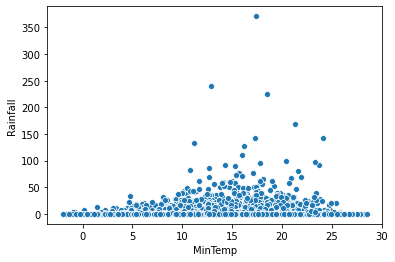

In [13]:
sns.scatterplot(x='MinTemp',y='Rainfall',data=df)

Between the range of temp 10 to 24, chances for more rainfall

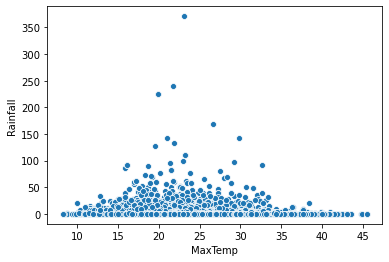

In [14]:
sns.scatterplot(x='MaxTemp',y='Rainfall',data=df)

As we discussed, here also we can visulise that rainfall temp area is between 15 to 26

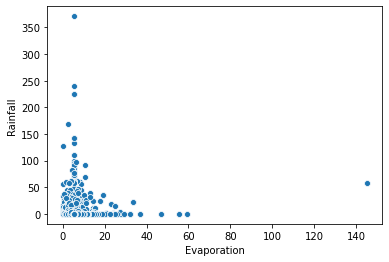

In [15]:
sns.scatterplot(x='Evaporation',y='Rainfall',data=df)

Here, we can clearly visulise that evporation range between 0 to 18 leads to high rainfall

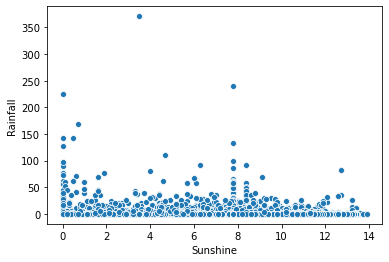

In [16]:
sns.scatterplot(x='Sunshine',y='Rainfall',data=df)

Sunshine is not much looking relative towards rainfall

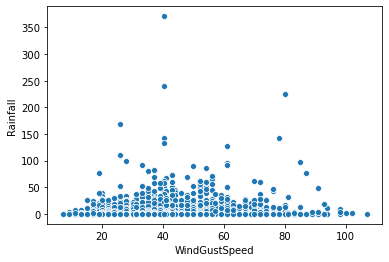

In [17]:
sns.scatterplot(x='WindGustSpeed',y='Rainfall',data=df)

When wind gust speed is between 20 to 80 and specially 40 to 60, higher chances of rain

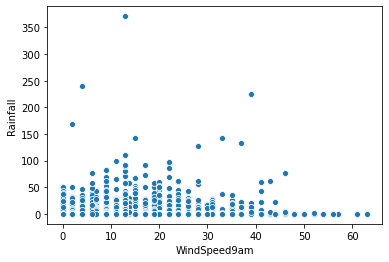

In [18]:
sns.scatterplot(x='WindSpeed9am',y='Rainfall',data=df)

Low wind speed leads to high rainfall in morning session

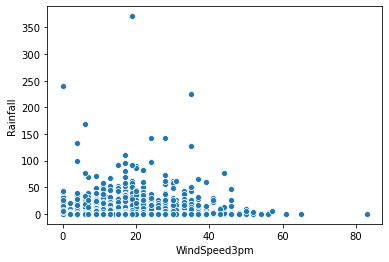

In [19]:
sns.scatterplot(x='WindSpeed3pm',y='Rainfall',data=df)

As wind speed increase chances of rain going to decrease, so here we found negative corelation ship

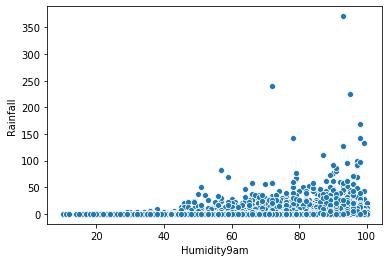

In [20]:
sns.scatterplot(x='Humidity9am',y='Rainfall',data=df)

Higher humidity leads to more rainfall and when humidity increase to 60+, more chances for rain

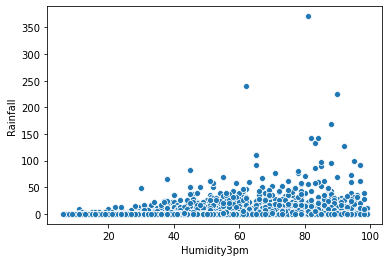

In [21]:
sns.scatterplot(x='Humidity3pm',y='Rainfall',data=df)

In afternoon slot, here we can mark that lower humidity have also chances for rain like 30 to 40, which is less possible in morning time

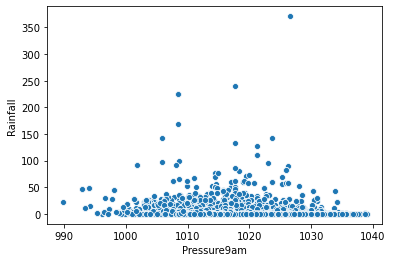

In [22]:
sns.scatterplot(x='Pressure9am',y='Rainfall',data=df)

Low pressure is required for higher rainfall and here we can mark that pressure between 1000 to 1030 is more suitable for rainy condition

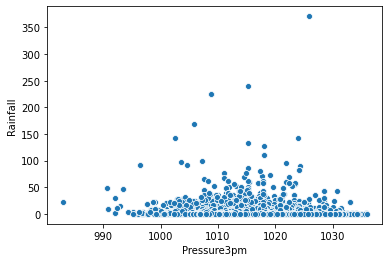

In [23]:
sns.scatterplot(x='Pressure3pm',y='Rainfall',data=df)

Low pressure is required for higher rainfall and here we can mark that pressure between 1000 to 1030 is more suitable for rainy condition

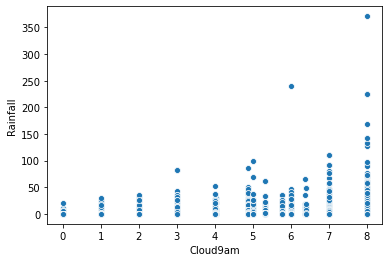

In [24]:
sns.scatterplot(x='Cloud9am',y='Rainfall',data=df)

More cloudy environment leads to high rainfall

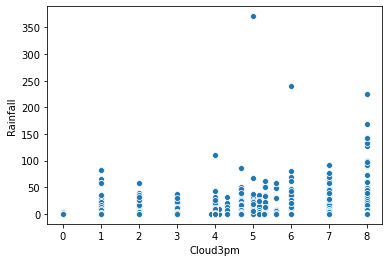

In [25]:
sns.scatterplot(x='Cloud3pm',y='Rainfall',data=df)

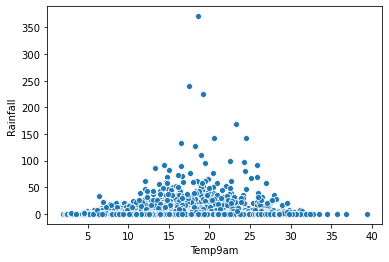

In [26]:
sns.scatterplot(x='Temp9am',y='Rainfall',data=df)

It is common that temperature should be low for high rainfall nearly to 8 to 25

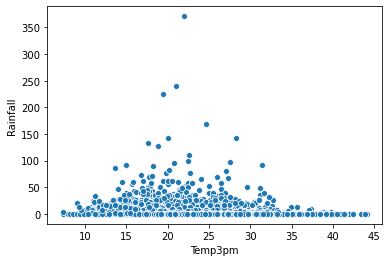

In [27]:
sns.scatterplot(x='Temp3pm',y='Rainfall',data=df)

In afternoon, we can mark that chances of rainfall is also good at 30 degree temp, which is less possible in morning

In [28]:
df.nunique()

Date             3004
Location           12
MinTemp           291
MaxTemp           337
Rainfall          259
Evaporation       117
Sunshine          145
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       41
Humidity9am        91
Humidity3pm        95
Pressure9am       388
Pressure3pm       378
Cloud9am           15
Cloud3pm           18
Temp9am           308
Temp3pm           333
RainToday           2
RainTomorrow        2
dtype: int64

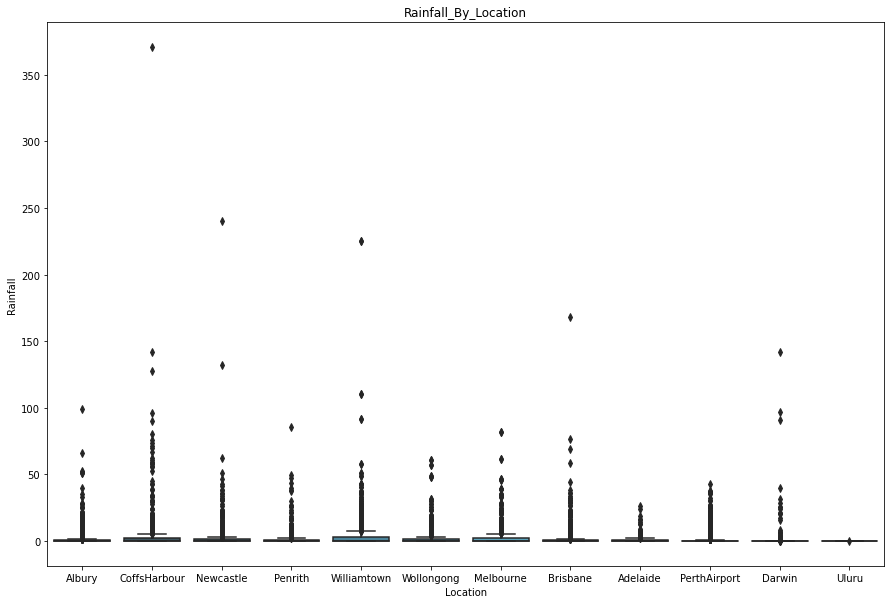

In [29]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Location', y = 'Rainfall', data = df, palette= 'GnBu_d').set_title('Rainfall_By_Location')
plt.show()

Not much clear but here we can mark 2 things:

1) Rainfall is low in Uluru and Adelaide

2) There are some outliers which plotted above 170, this observation may be right but it will effect our model when we work with average  here.

In [30]:
df.groupby('Location', as_index=False)['Rainfall'].mean()

,Location,Rainfall
0,Adelaide,1.407960
1,Albury,2.122272
2,Brisbane,3.112544
3,CoffsHarbour,5.439016
4,Darwin,2.735200
5,Melbourne,2.274567
6,Newcastle,3.032921
7,Penrith,2.358664
8,PerthAirport,1.916279
9,Uluru,0.010256


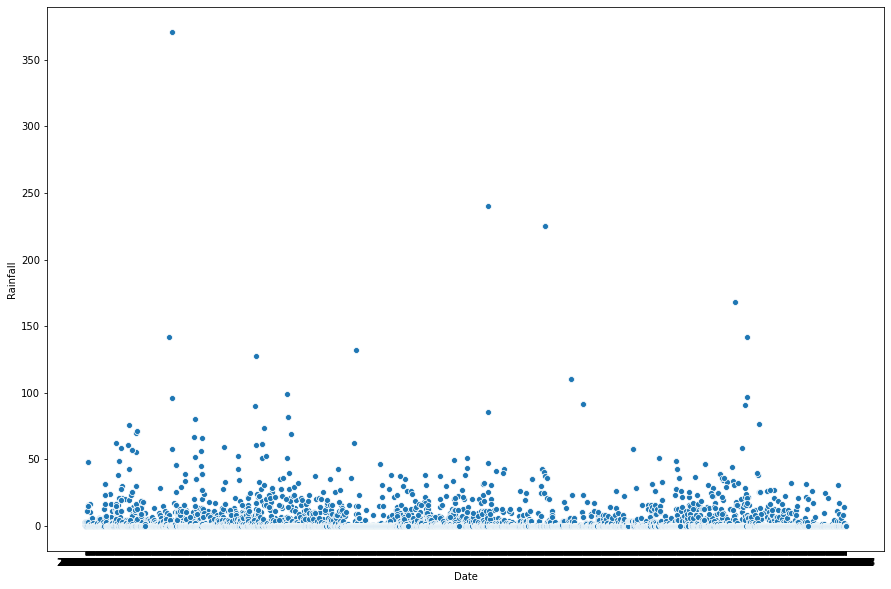

In [31]:
plt.figure(figsize = (15,10))
sns.scatterplot(x='Date',y='Rainfall',data=df)

In [32]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.775937,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.775937,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.775937,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.775937,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.775937,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [33]:
rain_today_tommorow = df.groupby(['RainToday','RainTomorrow']).apply(lambda df: round(df['RainTomorrow'].count(), 0))
print(rain_today_tommorow)

RainToday  RainTomorrow
No         No              5390
           Yes             1045
Yes        No              1044
           Yes              946
dtype: int64


In [34]:
print('IF Rain today chances of rain will come Tommorow also is', (946*100)/(1044+946))
print('IF Rain today chances of rain will not come Tommorow is', (1044*100)/(1044+946))
print('IF Rain not today chances of rain will come Tommorow is', (1045*100)/(1045+5390))
print('IF Rain not today chances of rain will not come Tommorow also is', (5390*100)/(1045+5390))

IF Rain today chances of rain will come Tommorow also is 47.537688442211056
IF Rain today chances of rain will not come Tommorow is 52.462311557788944
IF Rain not today chances of rain will come Tommorow is 16.23931623931624
IF Rain not today chances of rain will not come Tommorow also is 83.76068376068376


In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [37]:
df.drop(columns='Date',inplace=True)

In [38]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,Albury,13.4,22.9,0.6,5.389395,7.775937,W,44.0,W,WNW,...,1007.7,1007.1,8.000000,5.334247,16.9,21.8,No,No,2008,12
1,Albury,7.4,25.1,0.0,5.389395,7.775937,WNW,44.0,NNW,WSW,...,1010.6,1007.8,6.373961,5.334247,17.2,24.3,No,No,2008,12
2,Albury,12.9,25.7,0.0,5.389395,7.775937,WSW,46.0,W,WSW,...,1007.6,1008.7,6.373961,2.000000,21.0,23.2,No,No,2008,12
3,Albury,9.2,28.0,0.0,5.389395,7.775937,NE,24.0,SE,E,...,1017.6,1012.8,6.373961,5.334247,18.1,26.5,No,No,2008,12
4,Albury,17.5,32.3,1.0,5.389395,7.775937,W,41.0,ENE,NW,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12
5,Albury,14.6,29.7,0.2,5.389395,7.775937,WNW,56.0,W,W,...,1009.2,1005.4,6.373961,5.334247,20.6,28.9,No,No,2008,12
6,Albury,14.3,25.0,0.0,5.389395,7.775937,W,50.0,SW,W,...,1009.6,1008.2,1.000000,5.334247,18.1,24.6,No,No,2008,12
7,Albury,7.7,26.7,0.0,5.389395,7.775937,W,35.0,SSE,W,...,1013.4,1010.1,6.373961,5.334247,16.3,25.5,No,No,2008,12
8,Albury,9.7,31.9,0.0,5.389395,7.775937,NNW,80.0,SE,NW,...,1008.9,1003.6,6.373961,5.334247,18.3,30.2,No,Yes,2008,12
9,Albury,13.1,30.1,1.4,5.389395,7.775937,W,28.0,S,SSE,...,1007.0,1005.7,6.373961,5.334247,20.1,28.2,Yes,No,2008,12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

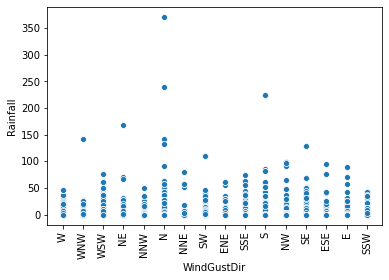

In [39]:
sns.scatterplot(x='WindGustDir',y='Rainfall',data=df)
plt.xticks(rotation = 90)

We can mark that when wind direction is of N or NE or NW...chances of rain increase

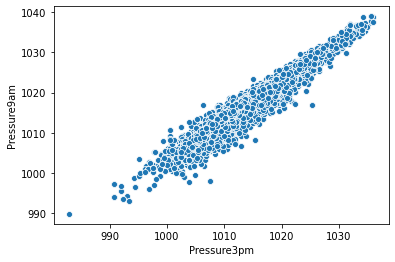

In [40]:
sns.scatterplot(x='Pressure3pm',y='Pressure9am',data=df)

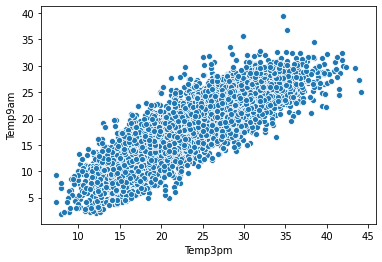

In [41]:
sns.scatterplot(x='Temp3pm',y='Temp9am',data=df)

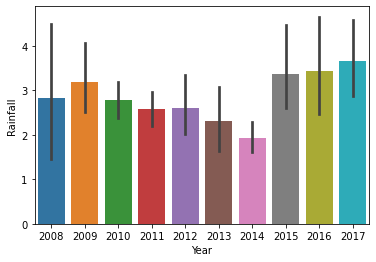

In [42]:
sns.barplot(x ='Year', y ='Rainfall',
data = df)

Rain average is increase in last 3 years 

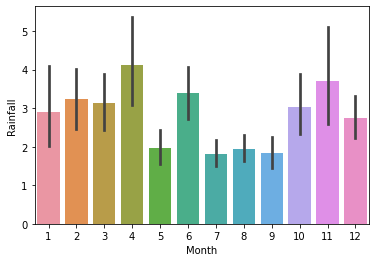

In [43]:
sns.barplot(x ='Month', y ='Rainfall',
data = df)

Here, we can visulise that good rain in Feb, March, April, November, December,January

In [44]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Year               int64
Month              int64
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder

lb= LabelEncoder()
df['Location'] = lb.fit_transform(df['Location'])
df['WindGustDir'] = lb.fit_transform(df['WindGustDir'])
df['WindDir9am'] = lb.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = lb.fit_transform(df['WindDir3pm'])
df['RainToday'] = lb.fit_transform(df['RainToday'])
df['RainTomorrow'] = lb.fit_transform(df['RainTomorrow'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,13.4,22.9,0.6,5.389395,7.775937,13,44.0,13,14,...,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0,0,2008,12
1,1,7.4,25.1,0.0,5.389395,7.775937,14,44.0,6,15,...,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0,0,2008,12
2,1,12.9,25.7,0.0,5.389395,7.775937,15,46.0,13,15,...,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0,0,2008,12
3,1,9.2,28.0,0.0,5.389395,7.775937,4,24.0,9,0,...,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0,0,2008,12
4,1,17.5,32.3,1.0,5.389395,7.775937,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12


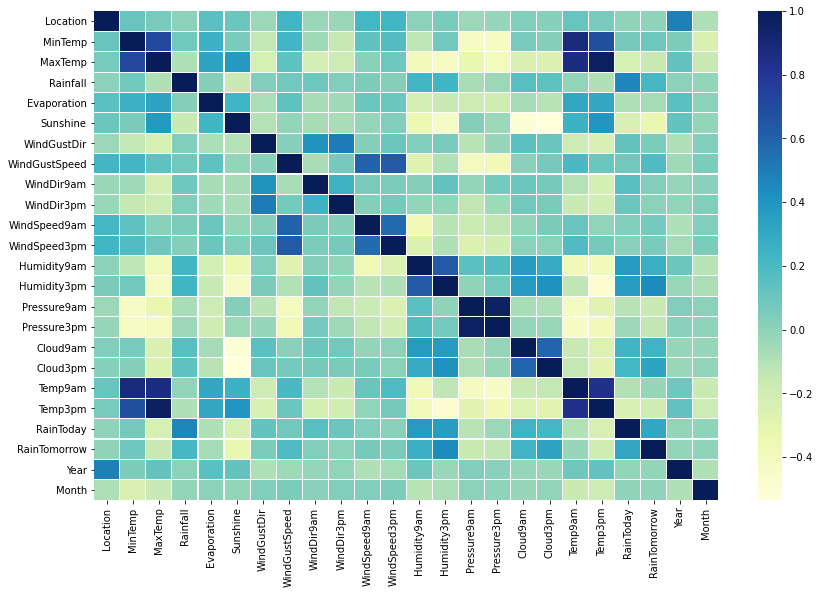

In [46]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

In [47]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(8425, 24)
(8015, 24)


In [48]:
df_1.skew()

Location        -0.041990
MinTemp         -0.082257
MaxTemp          0.319476
Rainfall         3.481341
Evaporation      0.849303
Sunshine        -0.865934
WindGustDir      0.110390
WindGustSpeed    0.506771
WindDir9am       0.163759
WindDir3pm      -0.125941
WindSpeed9am     0.707456
WindSpeed3pm     0.315920
Humidity9am     -0.263745
Humidity3pm      0.119599
Pressure9am     -0.049201
Pressure3pm     -0.038693
Cloud9am        -0.645031
Cloud3pm        -0.473673
Temp9am         -0.028065
Temp3pm          0.337981
RainToday        1.298939
RainTomorrow     1.289661
Year             0.430057
Month            0.051034
dtype: float64

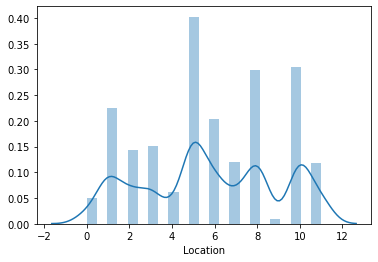

In [49]:
sns.distplot(df['Location'])

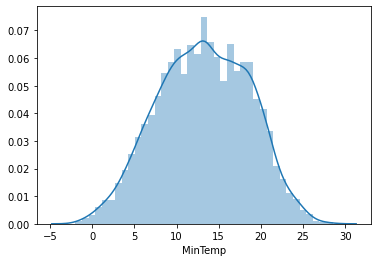

In [50]:
sns.distplot(df['MinTemp'])

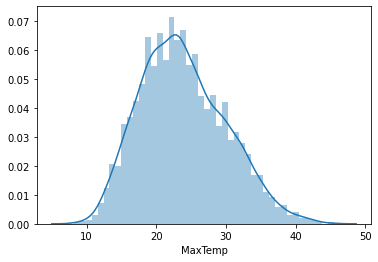

In [51]:
sns.distplot(df['MaxTemp'])

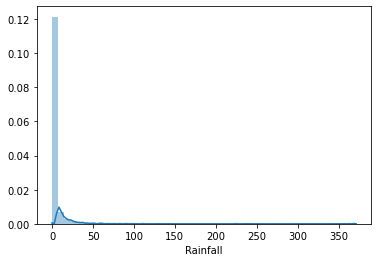

In [52]:
sns.distplot(df['Rainfall'])
#Right skewed

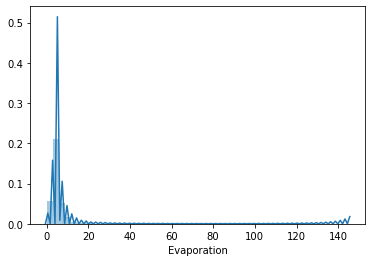

In [53]:
sns.distplot(df['Evaporation'])
#Right skewed

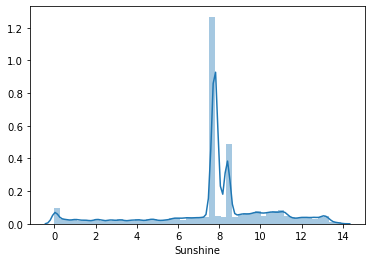

In [54]:
sns.distplot(df['Sunshine'])

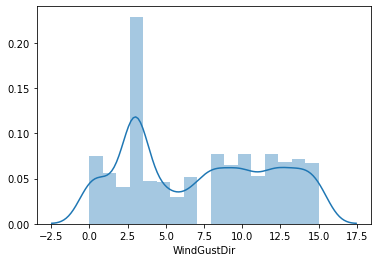

In [55]:
sns.distplot(df['WindGustDir'])

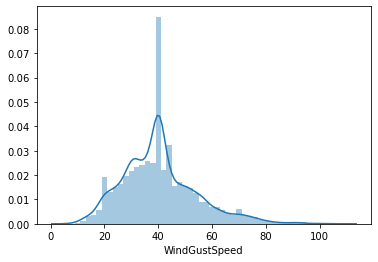

In [56]:
sns.distplot(df['WindGustSpeed'])

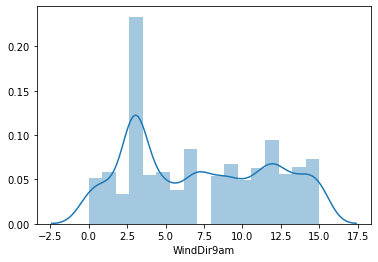

In [57]:
sns.distplot(df['WindDir9am'])

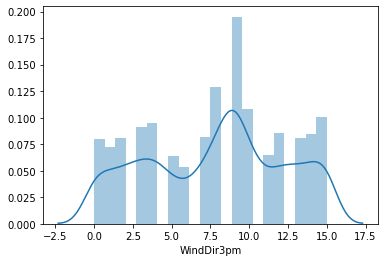

In [58]:
sns.distplot(df['WindDir3pm'])

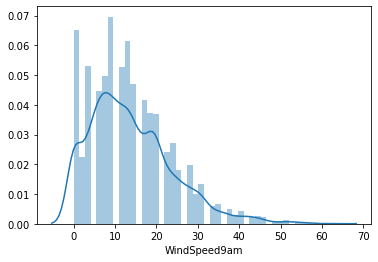

In [59]:
sns.distplot(df['WindSpeed9am'])
#minor Right skwed

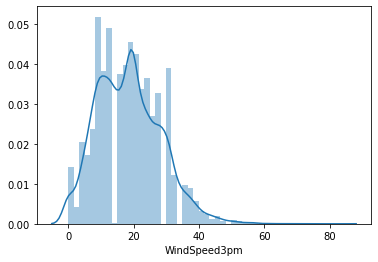

In [60]:
sns.distplot(df['WindSpeed3pm'])

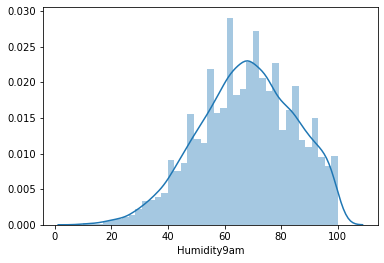

In [61]:
sns.distplot(df['Humidity9am'])
#Left Skewed

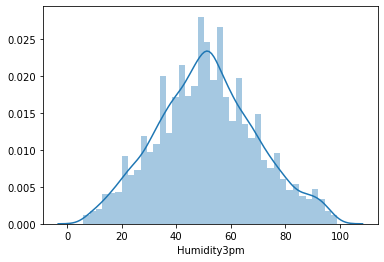

In [62]:
sns.distplot(df['Humidity3pm'])

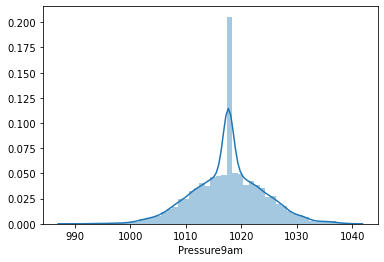

In [63]:
sns.distplot(df['Pressure9am'])

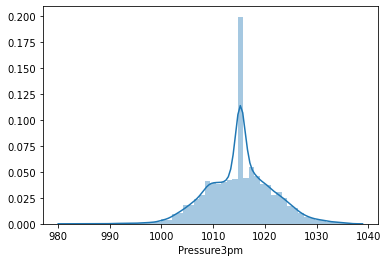

In [64]:
sns.distplot(df['Pressure3pm'])

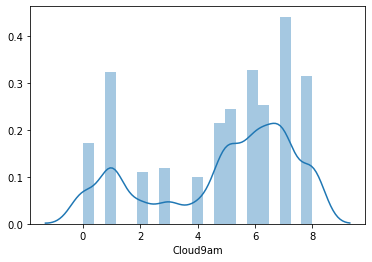

In [65]:
sns.distplot(df['Cloud9am'])

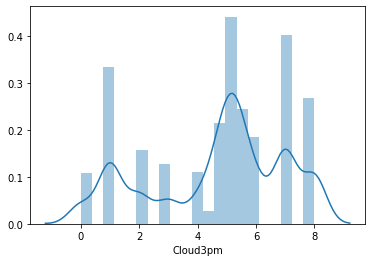

In [66]:
sns.distplot(df['Cloud3pm'])

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


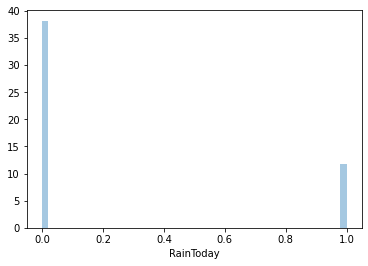

In [67]:
sns.distplot(df['RainToday'])

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


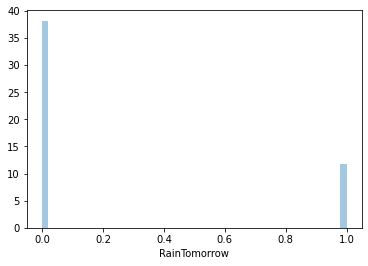

In [68]:
sns.distplot(df['RainTomorrow'])

In [69]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=0.50:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -0.50:
        df_1[col]=np.power(df_1[col],2)
        
#remove skewness using cuberoot and power transformation

<ipython-input-69-c563f62f321d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=np.cbrt(df_1[col])
<ipython-input-69-c563f62f321d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=np.power(df_1[col],2)


In [70]:
df_1.skew()

Location        -0.041990
MinTemp         -0.082257
MaxTemp          0.319476
Rainfall         1.321597
Evaporation      0.033835
Sunshine         0.627597
WindGustDir      0.110390
WindGustSpeed   -0.179338
WindDir9am       0.163759
WindDir3pm      -0.125941
WindSpeed9am     0.006337
WindSpeed3pm     0.315920
Humidity9am     -0.263745
Humidity3pm      0.119599
Pressure9am     -0.049201
Pressure3pm     -0.038693
Cloud9am         0.005565
Cloud3pm        -0.473673
Temp9am         -0.028065
Temp3pm          0.337981
RainToday        1.298939
RainTomorrow     1.289661
Year             0.430057
Month            0.051034
dtype: float64

In [71]:
df_1.head()

df2 = df_1.copy()

In [72]:
df_1.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
count,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,...,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000
mean,5.752090,13.103302,23.782760,0.536780,2.905784,68.891547,7.228197,3.361580,7.265502,7.820961,...,1017.745504,1015.335086,29.743721,4.650510,17.682633,22.379565,0.227698,0.229070,2012.078977,6.430318
std,3.154977,5.383110,6.020933,0.816575,0.909020,39.079543,4.703588,0.375932,4.577413,4.417958,...,6.054526,6.003752,20.896009,2.324161,5.586736,5.849695,0.419373,0.420261,2.455875,3.415799
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,1.912931,0.000000,0.000000,...,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000
25%,3.000000,9.100000,19.300000,0.000000,2.435131,60.465191,3.000000,3.141381,3.000000,4.000000,...,1014.200000,1011.600000,9.000000,3.000000,13.700000,18.100000,0.000000,0.000000,2010.000000,3.000000
50%,6.000000,13.100000,23.300000,0.000000,3.073926,60.465191,7.000000,3.424917,7.000000,8.000000,...,1017.640209,1015.236740,33.365824,5.154047,17.700000,22.000000,0.000000,0.000000,2011.000000,6.000000
75%,8.000000,17.200000,27.900000,1.062659,3.073926,81.000000,12.000000,3.583048,12.000000,11.000000,...,1021.400000,1018.900000,49.000000,7.000000,21.800000,26.200000,0.000000,0.000000,2014.000000,9.000000
max,11.000000,28.300000,42.000000,3.220442,6.507368,193.210000,15.000000,4.326749,15.000000,15.000000,...,1036.300000,1033.800000,64.000000,8.000000,34.500000,40.100000,1.000000,1.000000,2017.000000,12.000000


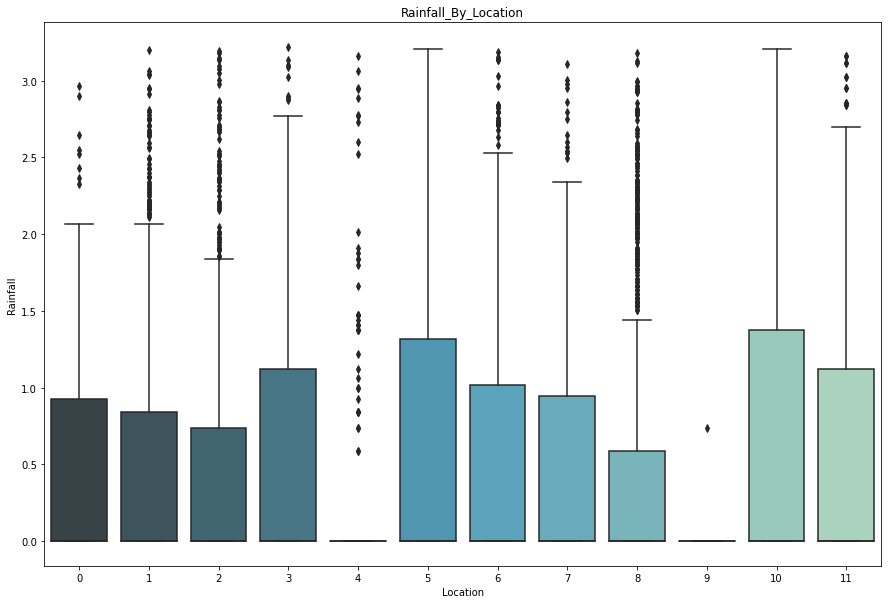

In [73]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Location', y = 'Rainfall', data = df_1, palette= 'GnBu_d').set_title('Rainfall_By_Location')
plt.show()

In [74]:
x =df_1.drop('RainTomorrow',axis=1)
y =df_1['RainTomorrow']

In [75]:
STD=StandardScaler()
x=STD.fit_transform(x)

In [76]:
lg=LogisticRegression()

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 90 score
test score 83.48303393213573
train score 83.53019464315422
Random state 101 score
test score 83.63273453093812
train score 83.64664781234403
Random state 132 score
test score 83.58283433133732
train score 83.6133754782898
Random state 181 score
test score 83.33333333333334
train score 83.33056063882881
Random state 219 score
test score 83.43313373253493
train score 83.44701380801864
Random state 255 score
test score 83.48303393213573
train score 83.5135584761271
Random state 276 score
test score 83.58283433133732
train score 83.56346697720845
Random state 277 score
test score 83.53293413173652
train score 83.48028614207287
Random state 303 score
test score 83.28343313373253
train score 83.34719680585593
Random state 419 score
test score 83.53293413173652
train score 83.5135584761271
Random state 456 score
test score 83.58283433133732
train score 83.6133754782898
Random state 470 score
test score 83.58283433133732
train score 83.64664781234403


In [77]:
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()


In [78]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

### LOGISTIC REGRESSION

In [79]:
fun(lg)

Accuracy Score 83.18363273453095
Confusion Matrix
 [[1452  110]
 [ 227  215]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      1562
         1.0       0.66      0.49      0.56       442

    accuracy                           0.83      2004
   macro avg       0.76      0.71      0.73      2004
weighted avg       0.82      0.83      0.82      2004

F1 score 56.06258148631029


### SUPPORT VECTOR CLASSIFIER

In [80]:
fun(svc)

Accuracy Score 85.22954091816366
Confusion Matrix
 [[1493   69]
 [ 227  215]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1562
         1.0       0.76      0.49      0.59       442

    accuracy                           0.85      2004
   macro avg       0.81      0.72      0.75      2004
weighted avg       0.84      0.85      0.84      2004

F1 score 59.22865013774105


### DECISION TREE CLASSIFIER

In [81]:
fun(dtc)

Accuracy Score 84.68063872255489
Confusion Matrix
 [[1397  165]
 [ 142  300]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1562
         1.0       0.65      0.68      0.66       442

    accuracy                           0.85      2004
   macro avg       0.78      0.79      0.78      2004
weighted avg       0.85      0.85      0.85      2004

F1 score 66.1521499448732


In [82]:
fun(gb)

Accuracy Score 76.89620758483034
Confusion Matrix
 [[1270  292]
 [ 171  271]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.85      1562
         1.0       0.48      0.61      0.54       442

    accuracy                           0.77      2004
   macro avg       0.68      0.71      0.69      2004
weighted avg       0.79      0.77      0.78      2004

F1 score 53.93034825870647


### KNN CLASSIFIER

In [83]:
fun(knn)

Accuracy Score 82.43512974051896
Confusion Matrix
 [[1451  111]
 [ 241  201]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      1562
         1.0       0.64      0.45      0.53       442

    accuracy                           0.82      2004
   macro avg       0.75      0.69      0.71      2004
weighted avg       0.81      0.82      0.81      2004

F1 score 53.315649867374006


### SGDC CLASSIFIER

In [84]:
fun(sgdc)

Accuracy Score 83.53293413173652
Confusion Matrix
 [[1467   95]
 [ 235  207]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1562
         1.0       0.69      0.47      0.56       442

    accuracy                           0.84      2004
   macro avg       0.77      0.70      0.73      2004
weighted avg       0.82      0.84      0.82      2004

F1 score 55.645161290322584


### RANDOM FOREST CLASSIFIER

In [85]:
fun(rndf)
pred=rndf.predict(x_test)

Accuracy Score 88.87225548902195
Confusion Matrix
 [[1512   50]
 [ 173  269]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1562
         1.0       0.84      0.61      0.71       442

    accuracy                           0.89      2004
   macro avg       0.87      0.79      0.82      2004
weighted avg       0.89      0.89      0.88      2004

F1 score 70.69645203679369


### Ensembel Method

In [86]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()


### ADABOOST CLASSIFIER

In [87]:
fun(ad)
pred=ad.predict(x_test)

Accuracy Score 83.33333333333334
Confusion Matrix
 [[1461  101]
 [ 233  209]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1562
         1.0       0.67      0.47      0.56       442

    accuracy                           0.83      2004
   macro avg       0.77      0.70      0.73      2004
weighted avg       0.82      0.83      0.82      2004

F1 score 55.58510638297872


### GRADIENT BOOST CLASSIFIER

In [88]:
fun(gd)
pred=gd.predict(x_test)

Accuracy Score 85.07984031936128
Confusion Matrix
 [[1482   80]
 [ 219  223]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1562
         1.0       0.74      0.50      0.60       442

    accuracy                           0.85      2004
   macro avg       0.80      0.73      0.75      2004
weighted avg       0.84      0.85      0.84      2004

F1 score 59.86577181208054


### SVC HYPER PARAMETER TUNING

In [89]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [90]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   6.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=  30.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=  34.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=  34.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 25.6min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [91]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [92]:
svc1 = SVC(C =10, gamma = 0.1)
svc1.fit(x_train,y_train)

SVC(C=10, gamma=0.1)

In [93]:
svc1.score(x_test,y_test)

0.8647704590818364

### RANDOM FOREST CLASSIFIER

In [94]:
rndf1=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=10)
fun(rndf1)

Accuracy Score 83.38323353293413
Confusion Matrix
 [[1501   61]
 [ 272  170]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1562
         1.0       0.74      0.38      0.51       442

    accuracy                           0.83      2004
   macro avg       0.79      0.67      0.70      2004
weighted avg       0.82      0.83      0.81      2004

F1 score 50.520059435364054


### DECISION TREE CLASSIFIER HYPER PARAMETER TUNING

In [95]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range(1,10,2),
    'min_samples_split' : range(2,20,2),
    'splitter' : ['best','random']
}

In [96]:
grid_search = GridSearchCV(estimator = dtc,
                     param_grid = grid_param,
                     cv = 5,
                     n_jobs =-1)

In [97]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [98]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


In [99]:
grid_search.best_score_

0.8394588957445543

In [100]:
dtc1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 5, min_samples_split= 2, splitter= 'random')
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       splitter='random')

In [101]:
dtc1.score(x_test,y_test)

0.8163672654690619

CROSS VALIDATION

In [102]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)
score=cross_val_score(gd,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)
score=cross_val_score(svc1,x,y,cv=4)
print("score of cross validation score for svc classifier",score.mean()*100)
score=cross_val_score(rndf1,x,y,cv=4)
print("score of cross validation score for RNDF classifier",score.mean()*100)
score=cross_val_score(dtc1,x,y,cv=4)
print("score of cross validation score for DTC classifier",score.mean()*100)

score of cross validation score for svc 82.68247036805988
score of cross validation score for Decisiontreeclassifier 78.19089207735497
score of cross validation score for knn 79.95009357454774
score of cross validation score for GausianNB classifier 77.14285714285715
score of cross validation score for Randomforest classifier 79.60141873018814
score of cross validation score for Adaboost classifier 74.93562550385997
score of cross validation score for Gradientboost classifier 75.247520435913
score of cross validation score for svc classifier 75.48432839762313
score of cross validation score for RNDF classifier 80.67392424337545
score of cross validation score for DTC classifier 81.035762972308


In [103]:
score=cross_val_score(lg,x,y,cv=4)
print("score of cross validation score for DTC classifier",score.mean()*100)

score of cross validation score for DTC classifier 81.80945273706207


In [104]:
estimator=[]

estimator.append(('lg',LogisticRegression()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('rndf1',KNeighborsClassifier()))

In [105]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[0. 0. 0. ... 0. 0. 0.]
hard voting score  0


In [106]:
y_pred_prob= lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.03793687, 0.01917912, 0.02841664, ..., 0.16096891, 0.27255308,
       0.05926034])

In [107]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.7266542488166349


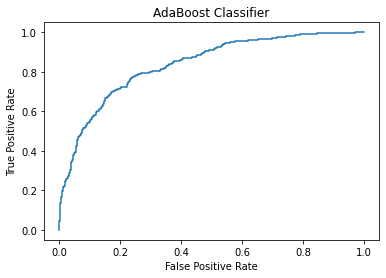

In [108]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier')
plt.show()

In [109]:
import pickle
filename='Weather_prediction.pkl'
pickle.dump(svc,open(filename,'wb'))

      Actual  Predict
1069     0.0      0.0
2750     0.0      0.0
4035     0.0      0.0
5444     0.0      0.0
3252     0.0      0.0
...      ...      ...
284      0.0      0.0
5336     1.0      0.0
2117     0.0      0.0
6495     0.0      0.0
5561     0.0      0.0

[2004 rows x 2 columns]


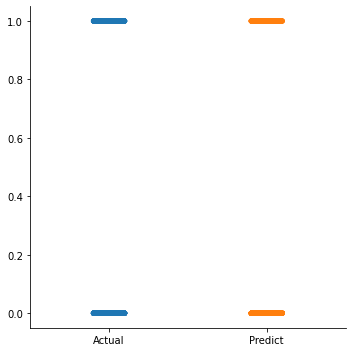

In [110]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=ad.predict(x_test)
print(res)
sns.catplot(data=res)

# RAINFALL PREDICTION

In [111]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,13.4,22.9,0.843433,3.073926,60.465191,13,3.530348,13,14,...,1007.7,1007.1,64.000000,5.334247,16.9,21.8,0.0,0.0,2008,12
1,1,7.4,25.1,0.000000,3.073926,60.465191,14,3.530348,6,15,...,1010.6,1007.8,40.627382,5.334247,17.2,24.3,0.0,0.0,2008,12
2,1,12.9,25.7,0.000000,3.073926,60.465191,15,3.583048,13,15,...,1007.6,1008.7,40.627382,2.000000,21.0,23.2,0.0,0.0,2008,12
3,1,9.2,28.0,0.000000,3.073926,60.465191,4,2.884499,9,0,...,1017.6,1012.8,40.627382,5.334247,18.1,26.5,0.0,0.0,2008,12
4,1,17.5,32.3,1.000000,3.073926,60.465191,13,3.448217,1,7,...,1010.8,1006.0,49.000000,8.000000,17.8,29.7,0.0,0.0,2008,12


In [112]:
df2['pressure'] = (df_1['Pressure9am']+df_1['Pressure3pm'])/2
df2['cloud'] = (df_1['Cloud9am']+df_1['Cloud3pm'])/2
df2['temperature'] = (df_1['Temp9am']+df_1['Temp3pm'])/2

In [113]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,pressure,cloud,temperature
0,1,13.4,22.9,0.843433,3.073926,60.465191,13,3.530348,13,14,...,5.334247,16.9,21.8,0.0,0.0,2008,12,1007.40,34.667123,19.35
1,1,7.4,25.1,0.000000,3.073926,60.465191,14,3.530348,6,15,...,5.334247,17.2,24.3,0.0,0.0,2008,12,1009.20,22.980814,20.75
2,1,12.9,25.7,0.000000,3.073926,60.465191,15,3.583048,13,15,...,2.000000,21.0,23.2,0.0,0.0,2008,12,1008.15,21.313691,22.10
3,1,9.2,28.0,0.000000,3.073926,60.465191,4,2.884499,9,0,...,5.334247,18.1,26.5,0.0,0.0,2008,12,1015.20,22.980814,22.30
4,1,17.5,32.3,1.000000,3.073926,60.465191,13,3.448217,1,7,...,8.000000,17.8,29.7,0.0,0.0,2008,12,1008.40,28.500000,23.75


In [114]:
df2.drop(['Temp3pm','Temp9am','Cloud3pm','Cloud9am','Pressure9am','Pressure3pm'], inplace = True, axis = 1)

In [115]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Year,Month,pressure,cloud,temperature
0,1,13.4,22.9,0.843433,3.073926,60.465191,13,3.530348,13,14,...,24.0,71.0,22.0,0.0,0.0,2008,12,1007.40,34.667123,19.35
1,1,7.4,25.1,0.000000,3.073926,60.465191,14,3.530348,6,15,...,22.0,44.0,25.0,0.0,0.0,2008,12,1009.20,22.980814,20.75
2,1,12.9,25.7,0.000000,3.073926,60.465191,15,3.583048,13,15,...,26.0,38.0,30.0,0.0,0.0,2008,12,1008.15,21.313691,22.10
3,1,9.2,28.0,0.000000,3.073926,60.465191,4,2.884499,9,0,...,9.0,45.0,16.0,0.0,0.0,2008,12,1015.20,22.980814,22.30
4,1,17.5,32.3,1.000000,3.073926,60.465191,13,3.448217,1,7,...,20.0,82.0,33.0,0.0,0.0,2008,12,1008.40,28.500000,23.75


In [116]:
x =df2.drop('Rainfall',axis=1)
y =df2['Rainfall']

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# to scale all data on same format

In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.25,random_state = 50) 

### LINEAR REGRESSION

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


In [120]:
lm = LinearRegression()
lm.fit(x_train,y_train)
Y_pred = lm.predict(x_test)
Y_pred= Y_pred.reshape(-1,1)
acc_reg = round(lm.score(x_train, y_train) * 100, 2)
acc_reg

77.5

In [121]:
print(lm)
print(lm.intercept_)
print(lm.coef_)

LinearRegression()
0.535141609350205
[ 1.00285843e-03  7.72932307e-02 -5.54638592e-02 -2.17124670e-02
  5.00112245e-03  4.56255963e-03  2.22091603e-02  1.86369217e-02
  1.40180878e-02  2.01725414e-02  4.22427629e-04  1.02103557e-01
 -1.86030208e-02  6.36282670e-01  2.65787480e-02  2.35165409e-02
  3.29401253e-02 -2.21622758e-02  9.25440442e-03  9.68556801e-04]


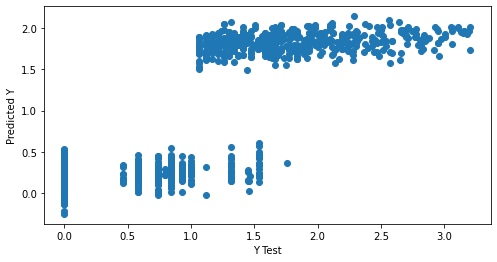

In [122]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print ('r2_score:', r2_score(y_test,Y_pred))


MAE: 0.280691013308313
MSE: 0.15106122612522016
RMSE: 0.38866595699291717
r2_score: 0.771932334217314


### GRADIENTBOOSTING REGRESSOR 

In [124]:
params = {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)

reg.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6)

In [125]:
reg_pred=reg.predict(x_test)
reg_pred= reg_pred.reshape(-1,1)


In [126]:
acc_gbr = round(reg.score(x_train, y_train) * 100, 2)
acc_gbr

90.09

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))
print ('r2_score:', r2_score(y_test,Y_pred))

MAE: 0.23140862976699897
MSE: 0.11311892796180431
RMSE: 0.33633157443481915
r2_score: 0.771932334217314


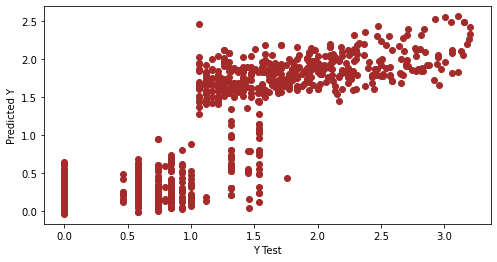

In [128]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,reg_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### DecisionTreeRegressor

In [129]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=100)

In [130]:
dtr_pred = dtreg.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)
acc_dtr = round(dtreg.score(x_train, y_train) * 100, 2)
acc_dtr

100.0

In [131]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print ('r2_score:', r2_score(y_test,Y_pred))

MAE: 0.2035704059457248
MSE: 0.18247679521507984
RMSE: 0.4271730272560287
r2_score: 0.771932334217314


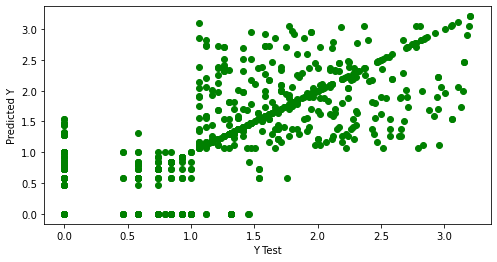

In [132]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


### SVR

In [133]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

SVR()

In [134]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)

In [135]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print ('r2_score:', r2_score(y_test,Y_pred))

MAE: 0.23454980198847883
MSE: 0.1326752633079021
RMSE: 0.36424615757465734
r2_score: 0.771932334217314


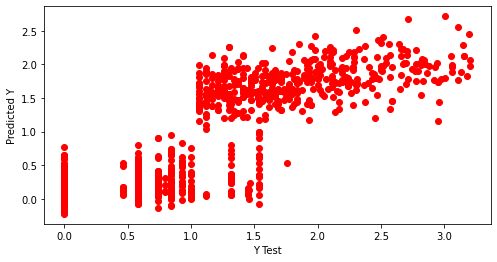

In [136]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### RANDOMFORESTREGRESSOR

In [137]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [138]:
rfr_pred= rfr.predict(x_test)
rfr_pred = rfr_pred.reshape(-1,1)
acc_rfr = round(rfr.score(x_train, y_train) * 100, 2)
acc_rfr

98.03

In [139]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print ('r2_score:', r2_score(y_test,Y_pred))

MAE: 0.20930161942570666
MSE: 0.09924804414282813
RMSE: 0.31503657588100487
r2_score: 0.771932334217314


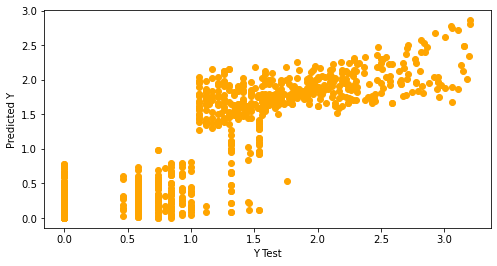

In [140]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### LGBM REGRESSOR

In [141]:
!pip install lightgbm
import lightgbm as lgb

In [142]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [143]:
model_lgb.fit(x_train,y_train)
lgb_pred = model_lgb.predict(x_test)
lgb_pred = lgb_pred.reshape(-1,1)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [144]:
Y_pred = model_lgb.predict(x_test)
acc_lgb = round(model_lgb.score(x_train, y_train) * 100, 2)
acc_lgb

86.12

In [145]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))
print ('r2_score:', r2_score(y_test,Y_pred))

MAE: 0.24749980626329462
MSE: 0.12337591425847134
RMSE: 0.35124907723504606
r2_score: 0.8137307798931163


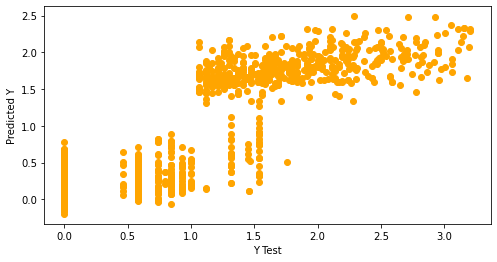

In [146]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### HYPER-PARAMETER TUNING- RANDOM FOREST REGRESSOR

In [147]:
param_grid = {

'bootstrap': [True],

'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

'max_features': ['auto','sqrt'],

'min_samples_leaf': [1, 2, 4],

'min_samples_split': [2, 5, 10],

'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

}

In [148]:
rf = RandomForestRegressor()

In [149]:
RF1 = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)

In [151]:
sd=pd.DataFrame({'column name':['lg','gbr','dtr','svr','rfr','LGBM']})

In [152]:
sd['score']=[77.5,90.09,100,78.6,98.03,86.05]
sd['MAE']=[0.28,0.23,0.20,0.23,0.20,0.24,]
sd['MSE']=[0.15,0.11,0.18,0.13,0.09,0.12,]
sd['RMSE']=[0.38,0.33,0.42,0.36,0.31,0.35]
sd['R2']=[0.77,0.77,0.77,0.77,0.77,0.81,]


In [153]:
sd

,column name,score,MAE,MSE,RMSE,R2
0,lg,77.50,0.28,0.15,0.38,0.77
1,gbr,90.09,0.23,0.11,0.33,0.77
2,dtr,100.00,0.20,0.18,0.42,0.77
3,svr,78.60,0.23,0.13,0.36,0.77
4,rfr,98.03,0.20,0.09,0.31,0.77
5,LGBM,86.05,0.24,0.12,0.35,0.81


Here, without doubt we can say that RFC is the best model as it have good accuracy, low error 

In [155]:
import pickle
# open a file, where you ant to store the data
file = open('rain_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)